<a href="https://colab.research.google.com/github/chaeyeon530/Final-Team4/blob/main/%EB%86%92%EC%9D%80_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# 한글 폰트 설정 (예: 나눔고딕)
mpl.rc('font', family='NanumGothic')  # 또는 'Malgun Gothic' (윈도우), 'AppleGothic' (Mac)

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/멋쟁이사자처럼_DAB6/파이널프로젝트/데이터/real_final_dataset.csv')

In [ ]:
# 판매자별 주문 개수 계산 (판매량)
seller_sales = df.groupby('판매자_ID')['주문_ID'].count().reset_index()
seller_sales.rename(columns={'주문_ID': '주문_개수'}, inplace=True)

# 판매자별 평균 리뷰 평점 계산
seller_review_score = df.groupby('판매자_ID')['리뷰_점수'].mean().reset_index()
seller_review_score.rename(columns={'리뷰_점수': '평균_리뷰_점수'}, inplace=True)

In [ ]:
# 평균 리뷰 점수가 높은 상위 10명의 판매자 선택
seller_review_score = df.groupby('판매자_ID')['리뷰_점수'].mean().reset_index()
seller_review_score.rename(columns={'리뷰_점수': '평균_리뷰_점수'}, inplace=True)

# 평균 리뷰 점수가 높은 상위 10명의 판매자 선택
top_10_sellers = seller_review_score.nlargest(10, '평균_리뷰_점수')

# 상위 10명의 판매자 ID 리스트 생성
top_10_seller_ids = top_10_sellers['판매자_ID'].unique()

# 상위 10명의 판매자에 해당하는 리뷰 데이터 필터링
top_10_seller_reviews = df[df['판매자_ID'].isin(top_10_seller_ids)]

# 리뷰 제목 및 내용이 있는 데이터만 선택
top_10_seller_reviews_with_content = top_10_seller_reviews.dropna(subset=['리뷰_제목', '리뷰_내용'], how='all')

# 결과 출력
print("평균 리뷰 점수가 높은 상위 10명의 판매자의 리뷰 (제목 또는 내용 포함):")
display(top_10_seller_reviews_with_content[['판매자_ID', '리뷰_점수', '리뷰_제목', '리뷰_내용']])

평균 리뷰 점수가 높은 상위 10명의 판매자의 리뷰 (제목 또는 내용 포함):


,판매자_ID,리뷰_점수,리뷰_제목,리뷰_내용
18,11742f81550ac064cc9a40f67151d9ad,5.0,Contente,NaN
144,09bad886111255c5b5030314fc7f1a4a,5.0,recomendo,NaN
706,11742f81550ac064cc9a40f67151d9ad,5.0,Otimo.,Fiquei muito satisfeita.
1109,01266d4c46afa519678d16a8b683d325,5.0,NaN,"Otima, chegou até antes do prazo, e conforme o..."
2381,11fb6f6d341adbe19e81733701704635,5.0,Muito satisfeito,"Produto de qualidade, muito bonito, superou mi..."
2514,09bad886111255c5b5030314fc7f1a4a,5.0,RECOMENDO,"RECEBI ANTES DO PRAZO, PRODUTO ÓTIMO, BEM EMBA..."
3011,0cab2da43793a6f3c5ed8514c5f54627,5.0,Recomendo,Produto atendeu às expectativas e chegou antes...
3622,09bad886111255c5b5030314fc7f1a4a,5.0,Muito boa!,Recebido no prazo. Produto como anunciado.
3683,11fb6f6d341adbe19e81733701704635,5.0,Perfeito,"Tapete lindo, entrega bem antes do esperado!"
4355,0cab2da43793a6f3c5ed8514c5f54627,5.0,Produto pequeno,"Gostei da loja, da qualidade do produto, da en..."


In [ ]:
# 판매량과 평균 리뷰 점수 데이터 병합
merged_df = pd.merge(seller_sales, seller_review_score, on='판매자_ID')

# 주문 개수가 10개 이상인 판매자 필터링
sellers_with_sufficient_sales = merged_df[merged_df['주문_개수'] >= 10]

# 필터링된 데이터에서 평균 리뷰 점수가 높은 상위 10명의 판매자 선택
top_10_sellers_filtered = sellers_with_sufficient_sales.nlargest(10, '평균_리뷰_점수')

# 결과 출력
print("주문 개수 10개 이상인 판매자 중 평균 리뷰 점수가 높은 상위 10명:")
display(top_10_sellers_filtered)

주문 개수 10개 이상인 판매자 중 평균 리뷰 점수가 높은 상위 10명:


,판매자_ID,주문_개수,평균_리뷰_점수
236,9d681c7e12db302cb261e721040dde65,14,4.928571
63,2d2322d842118867781fc737e96d59a1,11,4.909091
180,788e857f317e53de488d393e65a80f45,11,4.909091
378,ffad1e7127fb622cb64a900751590acd,15,4.866667
256,ae45df84722b1d15c5f32b23a095746c,12,4.833333
91,42fa4ee7240e9b8eb4576358ec142ba7,22,4.809524
118,54583ab379489add547fe47b628db589,10,4.800000
182,7ade73f1b9b4e965f9009a4c3a7e2c15,31,4.800000
68,30a81d8cf85fb2ada1b1b094c9583a95,22,4.772727
326,da6a60cc8cc724fe51be021ff8be779c,13,4.769231


In [ ]:
# 주문 개수 10개 이상인 판매자 중 평균 리뷰 점수가 높은 상위 10명의 판매자 ID 리스트 생성
top_10_filtered_seller_ids = top_10_sellers_filtered['판매자_ID'].unique()

# 상위 10명의 판매자에 해당하는 리뷰 데이터 필터링
top_10_filtered_seller_reviews = df[df['판매자_ID'].isin(top_10_filtered_seller_ids)]

# 리뷰 제목 및 내용이 있는 데이터만 선택
top_10_filtered_seller_reviews_with_content = top_10_filtered_seller_reviews.dropna(subset=['리뷰_제목', '리뷰_내용'], how='all')

# 결과 출력
print("주문 개수 10개 이상인 판매자 중 평균 리뷰 점수가 높은 상위 10명의 리뷰 (제목 또는 내용 포함):")
display(top_10_filtered_seller_reviews_with_content[['판매자_ID', '리뷰_점수', '리뷰_제목', '리뷰_내용']])

주문 개수 10개 이상인 판매자 중 평균 리뷰 점수가 높은 상위 10명의 리뷰 (제목 또는 내용 포함):


,판매자_ID,리뷰_점수,리뷰_제목,리뷰_내용
25,ae45df84722b1d15c5f32b23a095746c,5.0,otimo,NaN
48,42fa4ee7240e9b8eb4576358ec142ba7,5.0,Excelente,Chegou bem antes do proposto
149,7ade73f1b9b4e965f9009a4c3a7e2c15,5.0,Muito rápido,Muito rápida a entrega!!!
152,ae45df84722b1d15c5f32b23a095746c,5.0,Muito rapido,O prazo era de 15 dias e chegou com 3 dias.
153,ae45df84722b1d15c5f32b23a095746c,5.0,Muito rapido,O prazo era de 15 dias e chegou com 3 dias.
...,...,...,...,...
4871,2d2322d842118867781fc737e96d59a1,5.0,Tudo de ótima qualidade,Adorei os produtos. Teve coisas entregues até ...
4887,ae45df84722b1d15c5f32b23a095746c,5.0,ok,NaN
4913,ffad1e7127fb622cb64a900751590acd,5.0,NaN,Ótimo!
4936,7ade73f1b9b4e965f9009a4c3a7e2c15,5.0,Produto de excelência,"Capa muito bem feita, com fecho frontal em vel..."


-----
# 번역

In [ ]:
# 평균 리뷰 점수가 4점대 또는 5점대인 판매자 필터링 (4.0 이상 5.0 이하)
high_review_sellers = seller_review_score[(seller_review_score['평균_리뷰_점수'] >= 4.0) & (seller_review_score['평균_리뷰_점수'] <= 5.0)]

# 원본 데이터프레임과 평균 리뷰 점수 데이터 병합
df_with_avg_review = pd.merge(df, high_review_sellers[['판매자_ID', '평균_리뷰_점수']], on='판매자_ID', how='inner')

# 리뷰 제목 또는 내용이 있는 데이터만 선택
high_review_data_with_content = df_with_avg_review.dropna(subset=['리뷰_제목', '리뷰_내용'], how='all')

# 결과 출력
print("평균 리뷰 점수가 4점대 또는 5점대인 판매자의 리뷰 (제목 또는 내용 포함):")
high_review_data_with_content

평균 리뷰 점수가 4점대 또는 5점대인 판매자의 리뷰 (제목 또는 내용 포함):


,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_우편번호앞자리,고객_도시,고객_주,주문상품_순번,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,상품_카테고리명(포르투갈어),상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_우편번호앞자리,판매자_도시,판매자_주,결제_순번,결제_유형,결제_할부횟수,결제금액,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,상품_카테고리명(영어),mql_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,평균_리뷰_점수
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,1.0,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.40,14.05,perfumaria,39.0,991.0,3.0,150.0,20.0,20.0,20.0,71931.0,brasilia,DF,1.0,credit_card,10.0,146.45,5a8608437f4b52bec5cd143f37258b5e,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07,perfumery,7c3e1a45e4127c0eb25d7a8b7250da5b,068066e24f0c643eb1d089c7dd20cd73,060c0a26f19f4d66b42e0d8796688490,2018-04-10 19:17:03,health_beauty,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2017-08-30,fbc24da54d531c6204ae2d17b1090bb1,paid_search,4.666667
2,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17 00:00:00,9c9242ad7f1b52d926ea76778e1c0c57,18052,sorocaba,SP,1.0,e99d69efe684efaa643f99805f7c81bc,55c26bcb609f480eb7868594245febb5,2018-08-14 03:24:51,89.90,14.21,papelaria,56.0,115.0,1.0,600.0,33.0,13.0,25.0,14910.0,tabatinga,SP,1.0,boleto,1.0,104.11,9a55cbc65c8fad47581da5ebbb2b373e,5.0,Ótimo,Sempre vou comprar aqui pois é a melhor parabéns,2018-08-14 00:00:00,2018-08-14 21:52:46,stationery,f74b25a7dc1504cf5a3b964a990266ff,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-03-01 14:58:45,baby,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-19,b76ef37428e6799c421989521c0e5077,organic_search,4.000000
8,4b87488fb6269f8321508923b95da4d6,e42998ccffc48dc87bf70b37e2d61f33,delivered,2018-06-08 12:19:58,2018-06-08 12:37:01,2018-06-11 08:23:00,2018-06-15 20:58:47,2018-07-05 00:00:00,b2d3863477633ff42a3dad9a7dd61cda,36830,espera feliz,MG,1.0,ed739dfa91e2c770354726fe0bf9cc72,57df9869a600bd6b7c405f2a862eccfb,2018-06-15 12:30:36,25.00,13.47,utilidades_domesticas,48.0,798.0,6.0,250.0,22.0,5.0,14.0,37540.0,santa rita do sapucai,MG,1.0,credit_card,3.0,38.47,b4722acf07ffc2ebf10df6d3ce9089c1,5.0,NaN,eu adorei... e é uma gracinha... estava doida ...,2018-06-16 00:00:00,2018-06-20 15:28:28,housewares,c2dd0b60035ad00b08f81244a20b4860,56bf83c4bb35763a51c2baab501b4c67,4ef15afb4b2723d8f3d81e51ec7afefe,2018-01-16 12:36:23,household_utilities,online_medium,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0,2018-01-08,a0fbc0263cb98bdb0d72b9f9f283a172,paid_search,4.400000
9,f4471dae8c482f51aa1826cd9f5d4433,167b9485947ed0a354a3f8dad04eb199,delivered,2018-07-05 18:40:47,2018-07-05 18:55:15,2018-07-10 15:10:00,2018-07-11 21:16:47,2018-07-19 00:00:00,548a09978548d2e347d494793e34c797,6462,barueri,SP,2.0,f889fb87b505b73de10c18b93352469f,c70c1b0d8ca86052f45a432a38b73958,2018-07-10 18:55:15,110.32,12.53,beleza_saude,60.0,919.0,1.0,150.0,22.0,3.0,15.0,13186.0,hortolandia,SP,1.0,credit_card,8.0,232.14,f58ffe05a2a9a1f382fa553857768580,1.0,Péssima compra,Recebi um produto velho,2018-07-12 00:00:00,2018-07-13 04:54:36,health_beauty,7b6ad2297d3beb569ddf3ee1ce22ffa8,9e4d1098a3b0f5da39b0bc48f9876645,060c0a26f19f4d66b42e0d8796688490,2018-03-13 21:39:34,health_beauty,online_medium,shark,NaN,NaN,NaN,reseller,NaN,0.0,2018-03-13,22c29808c4f815213303f8933030604c,paid_search,4.321937
11,5561adcb0fd46da4cad3048fa4e7fc00,819b0aa9b717f6d78c0f72211bafebe3,delivered,2018-06-25 15:36:18,2018-06-25 15:58:17,2018-06-26 14:58:00,2018-06-27 17:18:42,2018-07-11 00:00:00,87d406e

In [ ]:
# 리뷰 점수가 1점, 2점, 3점인 데이터 제외 (4점 이상만 남김)
high_review_data_filtered_score = high_review_data_with_content[high_review_data_with_content['리뷰_점수'] >= 4.0]

# 결과 확인
print("평균 리뷰 점수 4점대/5점대 판매자의 리뷰 중 리뷰 점수가 4점 이상인 리뷰:")
high_review_data_filtered_score

평균 리뷰 점수 4점대/5점대 판매자의 리뷰 중 리뷰 점수가 4점 이상인 리뷰:


,주문_ID,고객_ID,주문상태,주문_구매일시,주문_승인일시,배송사_상품인수일,고객_배송완료일,예상_배송완료일,고객_고유ID,고객_우편번호앞자리,고객_도시,고객_주,주문상품_순번,상품_ID,판매자_ID,판매자_발송기한,상품_가격,배송비,상품_카테고리명(포르투갈어),상품명_글자수,상품설명_글자수,상품사진_수량,상품_무게_g,상품_길이_cm,상품_높이_cm,상품_너비_cm,판매자_우편번호앞자리,판매자_도시,판매자_주,결제_순번,결제_유형,결제_할부횟수,결제금액,리뷰_ID,리뷰_점수,리뷰_제목,리뷰_내용,리뷰_작성일,리뷰답변_처리일시,상품_카테고리명(영어),mql_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,평균_리뷰_점수
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,1.0,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.40,14.05,perfumaria,39.0,991.0,3.0,150.0,20.0,20.0,20.0,71931.0,brasilia,DF,1.0,credit_card,10.0,146.45,5a8608437f4b52bec5cd143f37258b5e,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07,perfumery,7c3e1a45e4127c0eb25d7a8b7250da5b,068066e24f0c643eb1d089c7dd20cd73,060c0a26f19f4d66b42e0d8796688490,2018-04-10 19:17:03,health_beauty,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2017-08-30,fbc24da54d531c6204ae2d17b1090bb1,paid_search,4.666667
2,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17 00:00:00,9c9242ad7f1b52d926ea76778e1c0c57,18052,sorocaba,SP,1.0,e99d69efe684efaa643f99805f7c81bc,55c26bcb609f480eb7868594245febb5,2018-08-14 03:24:51,89.90,14.21,papelaria,56.0,115.0,1.0,600.0,33.0,13.0,25.0,14910.0,tabatinga,SP,1.0,boleto,1.0,104.11,9a55cbc65c8fad47581da5ebbb2b373e,5.0,Ótimo,Sempre vou comprar aqui pois é a melhor parabéns,2018-08-14 00:00:00,2018-08-14 21:52:46,stationery,f74b25a7dc1504cf5a3b964a990266ff,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-03-01 14:58:45,baby,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-19,b76ef37428e6799c421989521c0e5077,organic_search,4.000000
8,4b87488fb6269f8321508923b95da4d6,e42998ccffc48dc87bf70b37e2d61f33,delivered,2018-06-08 12:19:58,2018-06-08 12:37:01,2018-06-11 08:23:00,2018-06-15 20:58:47,2018-07-05 00:00:00,b2d3863477633ff42a3dad9a7dd61cda,36830,espera feliz,MG,1.0,ed739dfa91e2c770354726fe0bf9cc72,57df9869a600bd6b7c405f2a862eccfb,2018-06-15 12:30:36,25.00,13.47,utilidades_domesticas,48.0,798.0,6.0,250.0,22.0,5.0,14.0,37540.0,santa rita do sapucai,MG,1.0,credit_card,3.0,38.47,b4722acf07ffc2ebf10df6d3ce9089c1,5.0,NaN,eu adorei... e é uma gracinha... estava doida ...,2018-06-16 00:00:00,2018-06-20 15:28:28,housewares,c2dd0b60035ad00b08f81244a20b4860,56bf83c4bb35763a51c2baab501b4c67,4ef15afb4b2723d8f3d81e51ec7afefe,2018-01-16 12:36:23,household_utilities,online_medium,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0,2018-01-08,a0fbc0263cb98bdb0d72b9f9f283a172,paid_search,4.400000
11,5561adcb0fd46da4cad3048fa4e7fc00,819b0aa9b717f6d78c0f72211bafebe3,delivered,2018-06-25 15:36:18,2018-06-25 15:58:17,2018-06-26 14:58:00,2018-06-27 17:18:42,2018-07-11 00:00:00,87d406e4698a66118241f1f4a407ee03,4216,sao paulo,SP,1.0,4d071a22b9cc548b64a75075a4c63151,131fcb0a0c9a47bba4474aacff0f14b7,2018-07-02 15:58:17,99.90,9.45,eletrodomesticos,35.0,342.0,3.0,750.0,22.0,7.0,22.0,1201.0,sao paulo,SP,1.0,credit_card,1.0,109.35,63948eb9cc4cf068c039f9f324ce7ed2,5.0,NaN,Entrega muito rapida,2018-06-28 00:00:00,2018-06-29 12:41:43,home_appliances,44ebc4e28c99d8aeaead73b4b70cc5e9,370c9f455f93a9a96cbe9bea48e70033,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-20 03:00:00,home_appliances,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-16,ce1a65abd0973638f1c887a6efcfa82d,paid_search,4.000000
15,b75b4f6e7c5fe3fa05707992a88d9d38,83da8aec5d2e8b2847e6ca45bea5588f,delivered,2018-08-02 14:41:02,2018-08-03 14:35:14,2018-08-06 08:31:00,2018-08-10 22:12:19,2018-08-16 00:00:00,bef61c4e2f6c5afdc

In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=e390c794f2e4ad9ec274c6e7ec4d04cb254282b89581781fc7fc4913a77c4433
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
!pip install -q deep-translator

from deep_translator import GoogleTranslator
GoogleTranslator(source='auto', target='ko').translate("Muito bom")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.3 MB/s eta 0:00:00


'매우 좋은'

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator

def translate_to_korean(text):
    """
    주어진 텍스트를 한국어로 번역합니다.
    """
    if pd.isna(text):
        return None
    try:
        translated_text = GoogleTranslator(source='auto', target='ko').translate(text)
        return translated_text
    except Exception as e:
        print(f"번역 오류 발생: {e}")
        return None

# '리뷰_제목' 및 '리뷰_내용' 열을 한국어로 번역
high_review_data_filtered_score['리뷰_제목_번역'] = high_review_data_filtered_score['리뷰_제목'].apply(translate_to_korean)
high_review_data_filtered_score['리뷰_내용_번역'] = high_review_data_filtered_score['리뷰_내용'].apply(translate_to_korean)

# 번역된 데이터 확인
display(
    high_review_data_filtered_score[
        ['리뷰_점수', '리뷰_제목', '리뷰_제목_번역', '리뷰_내용', '리뷰_내용_번역']
    ]
)

/tmp/ipython-input-4197825221.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_review_data_filtered_score['리뷰_제목_번역'] = high_review_data_filtered_score['리뷰_제목'].apply(translate_to_korean)
/tmp/ipython-input-4197825221.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_review_data_filtered_score['리뷰_내용_번역'] = high_review_data_filtered_score['리뷰_내용'].apply(translate_to_korean)


,리뷰_점수,리뷰_제목,리뷰_제목_번역,리뷰_내용,리뷰_내용_번역
1,5.0,Nota dez,10 학년,Obrigado pela atenção. Lojas lannister perfeit...,관심을 가져 주셔서 감사합니다. 모든 것에 완벽한 Lannister 매장.
2,5.0,Ótimo,훌륭한,Sempre vou comprar aqui pois é a melhor parabéns,나는 항상 최고의 축하이기 때문에 여기에서 항상 살 것입니다.
8,5.0,NaN,None,eu adorei... e é uma gracinha... estava doida ...,나는 그것을 좋아했다 ...
11,5.0,NaN,None,Entrega muito rapida,매우 빠른 배송
15,5.0,Contente,만족하는,NaN,None
...,...,...,...,...,...
3593,5.0,Excelente,훌륭한,O produto chegou antes do prazo estou muito sa...,마감일 전에 제품이 도착했습니다.
3598,5.0,NaN,None,Muito satisfeito entraga bem rapida,매우 만족스러운 것은 매우 빠르게 들어갑니다
3607,5.0,´´Otimo,´ 토티모,Muito obrigada,매우 감사합니다
3610,5.0,Super recomendo,슈퍼 추천,"Veio td certo chegou mt antes do prazo,perfeit...","마감일 전에 MT에 도착 했어, 완벽 해요, 나는 확실히 다시 살 것이다."


In [ ]:
# high_review_data_filtered_score.to_csv("high_review_translated.csv")

In [ ]:
!pip install wordcloud konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 45.2 MB/s eta 0:00:00


## 데이터 준비

### Subtask:
워드 클라우드 생성을 위해 필요한 리뷰 텍스트 데이터를 준비합니다.


**Reasoning**:
워드 클라우드 생성을 위해 필요한 리뷰 텍스트 데이터를 준비합니다. '리뷰_제목_번역'과 '리뷰_내용_번역' 열의 결측값이 아닌 값들을 각각 하나의 문자열로 합칩니다.



In [ ]:
# '리뷰_제목_번역' 열의 결측값이 아닌 값들을 모두 가져와 하나의 문자열로 합칩니다.
translated_titles_text = ' '.join(high_review_data_filtered_score['리뷰_제목_번역'].dropna())

# '리뷰_내용_번역' 열의 결측값이 아닌 값들을 모두 가져와 하나의 문자열로 합칩니다.
translated_contents_text = ' '.join(high_review_data_filtered_score['리뷰_내용_번역'].dropna())

# 결과 확인 (선택 사항)
print("합쳐진 리뷰 제목 텍스트의 길이:", len(translated_titles_text))
print("합쳐진 리뷰 내용 텍스트의 길이:", len(translated_contents_text))

합쳐진 리뷰 제목 텍스트의 길이: 5789
합쳐진 리뷰 내용 텍스트의 길이: 29014


## 텍스트 전처리

### Subtask:
워드 클라우드에 불필요한 단어를 제거하고 형태소 분석을 수행합니다.


**Reasoning**:
Import the necessary class for morphological analysis and define the stopword list and preprocessing function.



In [ ]:
from konlpy.tag import Okt

okt = Okt()

# 불용어 리스트 정의
stopwords = [
    '은',
    '는',
    '이',
    '가',
    '을',
    '를',
    '하다',
    '있다',
    '에',
    '에서',
    '와',
    '과',
    '도',
    '만',
    '고',
    '다',
    '습니다',
    '입니다',
    '으로',
    '에게',
    '에게서',
    '으로',
    '와서',
    '그리고',
    '그러나',
    '하지만',
    '그래서',
    '때문에',
    '정말',
    '아주',
    '매우',
    '너무',
    '가장',
    '더',
    '덜',
    '좀',
    '약간',
    '같이',
    '처럼',
    '만큼',
    '보다',
    '같이',
    '달리',
    '없이',
    '아니',
    '못',
    '안',
    '잘',
    '곧',
    '방금',
    '벌써',
    '아직',
    '이미',
    '차마',
    '차라리',
    '반드시',
    '결코',
    '결국',
    '겨우',
    '그냥',
    '단지',
    '다만',
    '대체로',
    '마침내',
    '실로',
    '오히려',
    '필시',
    '하마터면',
    '한결',
    '하물며',
    '함께',
    '혼자',
    '둘이',
    '셋이',
    '이',
    '그',
    '저',
    '어느',
    '무슨',
    '아무',
    '어떤',
    '여러',
    '몇',
    '각',
    '갖가지',
    '외',
    '내',
    '저',
    '위',
    '아래',
    '앞',
    '뒤',
    '옆',
    '안',
    '밖',
    '속',
    '겉',
    '등',
    '때',
    '곳',
    '줄',
    '것',
    '수',
    '분',
    '개',
    '마리',
    '가지',
    '번',
    '명',
    '사람',
    '때문',
    '경우',
    '동안',
    '통해',
    '으로부터',
    '에게',
    '으로',
    '로서',
    '로써',
    '와',
    '과',
    '처럼',
    '만큼',
    '보다',
    '없이',
    '아니라',
    '뿐만',
    '아니라',
    '대해',
    '관해',
    '따라',
    '위해',
    '대해',
    '통해',
    '인해',
    '말미암아',
    '따라서',
    '그래서',
    '그러므로',
    '그런데',
    '그리고',
    '또는',
    '혹은',
    '및',
    '내지',
    '또는',
    '등등',
    '등',
    '뿐',
    '대로',
    '만큼',
    '뿐',
    '지',
    '같이',
    '보다',
    '대로',
    '따라',
    '에게',
    '에',
    '에서',
    '으로',
    '와',
    '과',
    '에게',
    '으로',
    '처럼',
    '만큼',
    '보다',
    '없이',
    '아니라',
    '뿐만',
    '아니라',
    '대해',
    '관해',
    '따라',
    '위해',
    '대해',
    '통해',
    '인해',
    '말미암아',
    '따라서',
    '그래서',
    '그러므로',
    '그런데',
    '그리고',
    '또는',
    '혹은',
    '및',
    '내지',
    '또는',
    '등등',
    '등',
    '뿐',
    '대로',
    '만큼',
    '뿐',
    '지',
    '같이',
    '보다',
    '대로',
    '따라',
    '이렇다',
    '그렇다',
    '저렇다',
    '어떻다',
    '이러하다',
    '그러하다',
    '저러하다',
    '어떠하다',
    '아니다',
    '아니하다',
    '못하다',
    '아무렇다',
    '어찌하다',
    '어떠하다',
    '이렇든',
    '그렇든',
    '저렇든',
    '어떻든',
    '이러하든',
    '그러하든',
    '저러하든',
    '어떠하든',
    '이렇지',
    '그렇지',
    '저렇지',
    '어떻지',
    '이러하지',
    '그러하지',
    '저러하지',
    '어떠하지',
    '아니지',
    '아니하지',
    '못하지',
    '아무렇지',
    '어찌하지',
    '어떠하지',
    '이렇고',
    '그렇고',
    '저렇고',
    '어떻고',
    '이러하고',
    '그러하고',
    '저러하고',
    '어떠하고',
    '아니고',
    '아니하고',
    '못하고',
    '아무렇고',
    '어찌하고',
    '어떠하고',
    '이렇기에',
    '그렇기에',
    '저렇기에',
    '어떻기에',
    '이러하기에',
    '그러하기에',
    '저러하기에',
    '어떠하기에',
    '아니기에',
    '아니하기에',
    '못하기에',
    '아무렇기에',
    '어찌하기에',
    '어떠하기에',
    '이렇지만',
    '그렇지만',
    '저렇지만',
    '어떻지만',
    '이러하지만',
    '그러하지만',
    '저러하지만',
    '어떠하지만',
    '아니지만',
    '아니하지만',
    '못하지만',
    '아무렇지만',
    '어찌하지만',
    '어떠하지만',
    '이렇더라도',
    '그렇더라도',
    '저렇더라도',
    '어떻더라도',
    '이러하더라도',
    '그러하더라도',
    '저러하더라도',
    '어떠하더라도',
    '아니더라도',
    '아니하더라도',
    '못하더라도',
    '아무렇더라도',
    '어찌하더라도',
    '어떠하더라도',
    '이렇다',
    '그렇다',
    '저렇다',
    '어떻다',
    '이러하다',
    '그러하다',
    '저러하다',
    '어떠하다',
    '아니다',
    '아니하다',
    '못하다',
    '아무렇다',
    '어찌하다',
    '어떠하다',
    '이렇든',
    '그렇든',
    '저렇든',
    '어떻든',
    '이러하든',
    '그러하든',
    '저러하든',
    '어떠하든',
    '이렇지',
    '그렇지',
    '저렇지',
    '어떻지',
    '이러하지',
    '그러하지',
    '저러하지',
    '어떠하지',
    '아니지',
    '아니하지',
    '못하지',
    '아무렇지',
    '어찌하지',
    '어떠하지',
    '이렇고',
    '그렇고',
    '저렇고',
    '어떻고',
    '이러하고',
    '그러하고',
    '저러하고',
    '어떠하고',
    '아니고',
    '아니하고',
    '못하고',
    '아무렇고',
    '어찌하고',
    '어떠하고',
    '이렇기에',
    '그렇기에',
    '저렇기에',
    '어떻기에',
    '이러하기에',
    '그러하기에',
    '저러하기에',
    '어떠하기에',
    '아니기에',
    '아니하기에',
    '못하기에',
    '아무렇기에',
    '어찌하기에',
    '어떠하기에',
    '이렇지만',
    '그렇지만',
    '저렇지만',
    '어떻지만',
    '이러하지만',
    '그러하지만',
    '저러하지만',
    '어떠하지만',
    '아니지만',
    '아니하지만',
    '못하지만',
    '아무렇지만',
    '어찌하지만',
    '어떠하지만',
    '이렇더라도',
    '그렇더라도',
    '저렇더라도',
    '어떻더라도',
    '이러하더라도',
    '그러하더라도',
    '저러하더라도',
    '어떠하더라도',
    '아니더라도',
    '아니하더라도',
    '못하더라도',
    '아무렇더라도',
    '어찌하더라도',
    '어떠하더라도',
    '좋다',
    '좋은',
    '좋아',
    '싫다',
    '싫은',
    '싫어',
    '크다',
    '큰',
    '작다',
    '작은',
    '많다',
    '많은',
    '적다',
    '적은',
    '빠르다',
    '빠른',
    '느리다',
    '느린',
    '넓다',
    '넓은',
    '좁다',
    '좁은',
    '길다',
    '긴',
    '짧다',
    '짧은',
    '높다',
    '높은',
    '낮다',
    '낮은',
    '강하다',
    '강한',
    '약하다',
    '약한',
    '새롭다',
    '새로운',
    '오래되다',
    '오래된',
    '쉽다',
    '쉬운',
    '어렵다',
    '어려운',
    '같다',
    '같은',
    '다르다',
    '다른',
    '비슷하다',
    '비슷한',
    '없다',
    '있는',
    '없어',
    '있어',
    '되다',
    '되어',
    '된다',
    '된',
    '되어서',
    '돼서',
    '되니',
    '되므로',
    '되기',
    '되게',
    '되도록',
    '되면서',
    '되자마자',
    '되자',
    '되거나',
    '되든지',
    '되든',
    '되겠',
    '되었',
    '됐다',
    '될',
    '되면',
    '되지만',
    '되더라도',
    '됩니다',
    '되고',
    '되면',
    '되는',
    '될까',
    '될지',
    '될까봐',
    '될수',
    '있습니다',
    '있어요',
    '있어',
    '있습니다',
    '있어요',
    '있어',
    '있네',
    '있니',
    '있냐',
    '있나',
    '있으니',
    '있으면',
    '있지만',
    '있더라도',
    '있습니다',
    '있어요',
    '있어',
    '있네',
    '있니',
    '있냐',
    '있나',
    '있으니',
    '있으면',
    '있지만',
    '있더라도',
    '하다',
    '하여',
    '한다',
    '한',
    '해서',
    '하니',
    '하므로',
    '하기',
    '하게',
    '하도록',
    '하면서',
    '하자마자',
    '하자',
    '하거나',
    '하든지',
    '하든',
    '하겠',
    '하였',
    '했다',
    '할',
    '하면',
    '하지만',
    '하더라도',
    '합니다',
    '하고',
    '하면',
    '하는',
    '할까',
    '할지',
    '할까봐',
    '할수',
    '슈퍼',
    '제품',
    '그것'
]


def preprocess_text(text):
    """
    텍스트에서 명사를 추출하고 불용어 및 한 글자 단어를 제거합니다.
    """
    if text is None:
        return []
    nouns = okt.nouns(text)
    preprocessed_nouns = [
        noun for noun in nouns if len(noun) > 1 and noun not in stopwords
    ]
    return preprocessed_nouns


# 리뷰 제목 및 내용 전처리
preprocessed_titles = preprocess_text(translated_titles_text)
preprocessed_contents = preprocess_text(translated_contents_text)

# 전처리 결과 확인
print("전처리된 리뷰 제목 (일부):", preprocessed_titles[:20])
print("전처리된 리뷰 내용 (일부):", preprocessed_contents[:20])

전처리된 리뷰 제목 (일부): ['학년', '추천', '제공', '추천', '능률', '게시', '모두', '추천', '가게', '추천', '원본', '원본', '상점', '추천', '추천', '전달', '추천', '구매', '거래', '서비스']
전처리된 리뷰 내용 (일부): ['관심', '모든', '매장', '항상', '최고', '축하', '이기', '여기', '항상', '배송', '시간', '도착', '선물', '죄수', '제안', '도착', '파견', '배송', '구입', '하나']


**Reasoning**:
The preprocessing step is complete. Now I need to generate the word clouds from the preprocessed nouns.



In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow for image loading

# 리뷰 제목 명사 빈도 계산
title_word_counts = Counter(preprocessed_titles)

# 리뷰 내용 명사 빈도 계산
content_word_counts = Counter(preprocessed_contents)

# 워드 클라우드 생성 함수 정의
def generate_wordcloud(word_counts, title=None, mask_image=None):
    """
    단어 빈도수를 기반으로 워드 클라우드를 생성하고 출력합니다.
    mask_image가 제공되면 해당 이미지 모양으로 워드 클라우드를 생성합니다.
    """
    # 마스크 이미지가 제공된 경우 numpy array로 변환
    if mask_image:
        mask = np.array(Image.open(mask_image))
    else:
        mask = None

    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
        width=800,
        height=400,
        background_color='white',
        mask=mask, # Add mask parameter
    ).generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:  # Only set title if provided
        plt.title(title)
    plt.show()

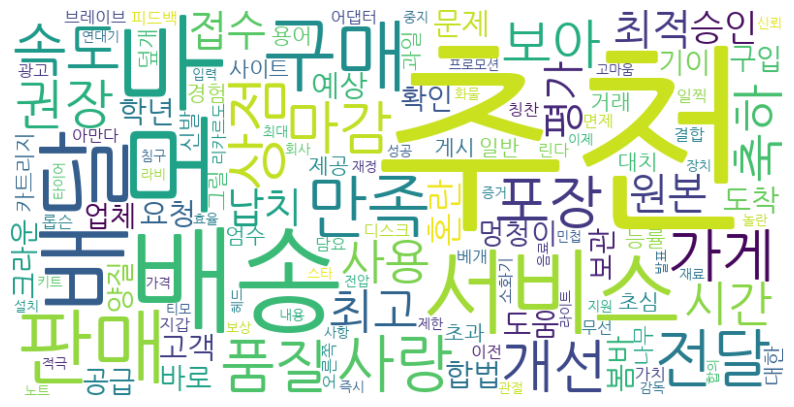

In [ ]:
# 리뷰 제목 워드 클라우드 생성
generate_wordcloud(title_word_counts)

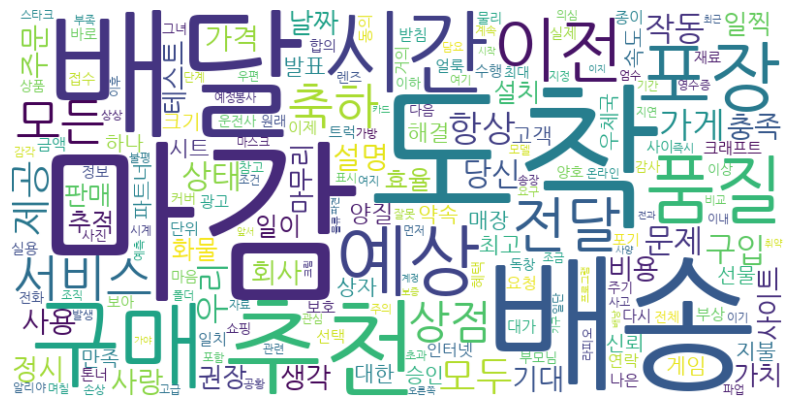

In [ ]:
# 리뷰 내용 워드 클라우드 생성
generate_wordcloud(content_word_counts)

## 데이터 준비 (수정)

### Subtask:
워드 클라우드 생성을 위해 필요한 리뷰 텍스트 데이터를 리뷰 제목과 내용을 합쳐서 준비합니다.

**Reasoning**:
'리뷰_제목_번역'과 '리뷰_내용_번역' 열을 하나의 텍스트 열로 합치고, 결측값이 아닌 값들만 선택하여 워드 클라우드 생성을 위한 단일 문자열로 만듭니다.

In [ ]:
# '리뷰_제목_번역'과 '리뷰_내용_번역' 열을 결측값 처리 후 하나의 Series로 합칩니다.
# 각 열의 결측값은 빈 문자열로 대체하여 합칠 때 오류를 방지합니다.
text_corpus_series = high_review_data_filtered_score['리뷰_제목_번역'].fillna('') + ' ' + high_review_data_filtered_score['리뷰_내용_번역'].fillna('')

# 합쳐진 Series에서 내용이 있는 행만 선택합니다.
text_corpus_series = text_corpus_series[text_corpus_series.str.strip() != '']

# 모든 텍스트를 하나의 문자열로 합칩니다.
combined_text_corpus = ' '.join(text_corpus_series)

# 결과 확인
print("합쳐진 전체 텍스트의 길이:", len(combined_text_corpus))
print("합쳐진 전체 텍스트 (일부):", combined_text_corpus[:500])

합쳐진 전체 텍스트의 길이: 35191
합쳐진 전체 텍스트 (일부): 10 학년 관심을 가져 주셔서 감사합니다. 모든 것에 완벽한 Lannister 매장. 훌륭한 나는 항상 최고의 축하이기 때문에 여기에서 항상 살 것입니다.  나는 그것을 좋아했다 ...  매우 빠른 배송 만족하는  추천하다 제품이 제 시간에 도착하고 올바른 제품 훌륭한  Bom 내가 문을 열 때 나는 그것을 좋아했고 이미 선물을 위해 싸여 있었다. 제품 제공  슈퍼 추천. 나는 죄수 전에 제품을 받았다. 훌륭한 제안되기 전에 잘 도착했습니다 능률 파견 및 빠른 배송 Bom 내가 2 개의 제품을 구입했지만 나는 하나만 배달되었다.  나는 정말로 좋아했다 완벽한 훌륭한 제품, 빠른 배송은 내 기대를 초과했습니다. 훌륭한 우수한 제품. 훌륭한 예상보다 일찍 도착했습니다. 훌륭한 슈퍼 추천, 우수한 제품. 빠른 제품을 게시했습니다  모두 아주 잘   책이 빠졌습니다. 훌륭한 축하해요.  마감일 전에 바로 도착했습니다 훌륭한 축하합니다. 나는 불평 할 것이 없다!  매우 빠른 배송, 마감일 


## 텍스트 전처리 (수정)

### Subtask:
합쳐진 리뷰 텍스트에서 워드 클라우드에 불필요한 단어를 제거하고 형태소 분석을 수행합니다.

**Reasoning**:
합쳐진 텍스트 코퍼스에 대해 형태소 분석을 수행하고 불용어 및 한 글자 단어를 제거하여 워드 클라우드 생성을 위한 단어 리스트를 준비합니다.

In [ ]:
# 합쳐진 텍스트 코퍼스 전처리
preprocessed_combined_text = preprocess_text(combined_text_corpus)

# 전처리 결과 확인
print("전처리된 합쳐진 텍스트 (일부):", preprocessed_combined_text[:20])

전처리된 합쳐진 텍스트 (일부): ['학년', '관심', '모든', '매장', '항상', '최고', '축하', '이기', '여기', '항상', '배송', '추천', '시간', '도착', '선물', '제공', '추천', '죄수', '제안', '도착']


## 워드 클라우드 생성 및 시각화 (수정)

### Subtask:
전처리된 합쳐진 리뷰 텍스트를 사용하여 워드 클라우드를 생성하고 시각화합니다.

**Reasoning**:
전처리된 합쳐진 텍스트의 단어 빈도를 계산하고, 이를 바탕으로 워드 클라우드를 생성하여 시각화합니다.

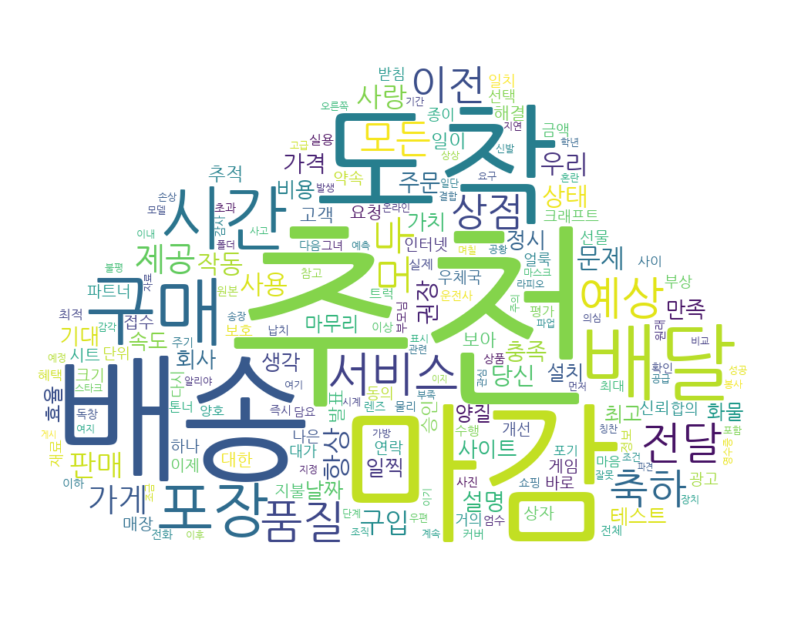

In [ ]:
# 합쳐진 텍스트 단어 빈도 계산
combined_word_counts = Counter(preprocessed_combined_text)

# 합쳐진 텍스트 워드 클라우드 생성 및 시각화 (제목 제거)
# 'cloud.png' 이미지를 mask로 사용하여 워드 클라우드 생성
generate_wordcloud(combined_word_counts, mask_image='/content/cloud.png')

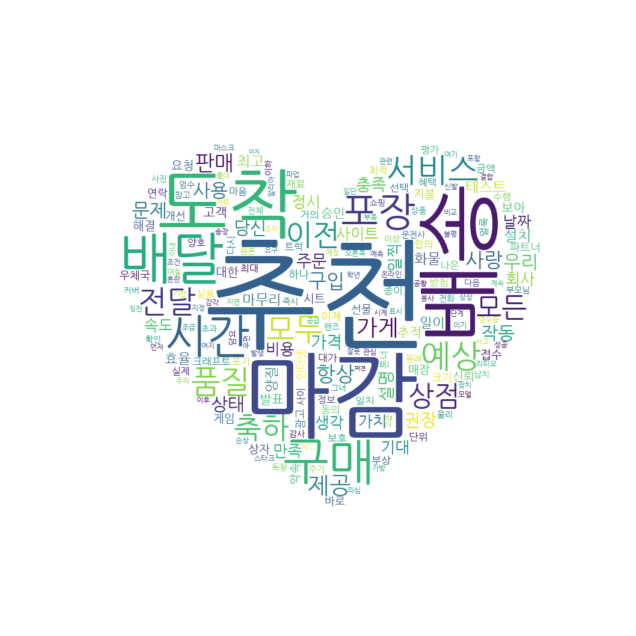

In [ ]:
# 합쳐진 텍스트 워드 클라우드 생성 및 시각화 (제목 제거)
# 'heart_mask.png' 이미지를 mask로 사용하여 워드 클라우드 생성
generate_wordcloud(combined_word_counts, mask_image='/content/heart_mask.png')